In [ ]:
# import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean dataset
# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_data_analysis_skills = df[df['job_title_short'] == 'Data Analyst']

In [24]:
df_exploded =df_data_analysis_skills.explode('job_skills')


In [16]:
df_skills = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

df_total_skill_count =df_skills.sort_values(by= 'skill_count', ascending=False).head(10)

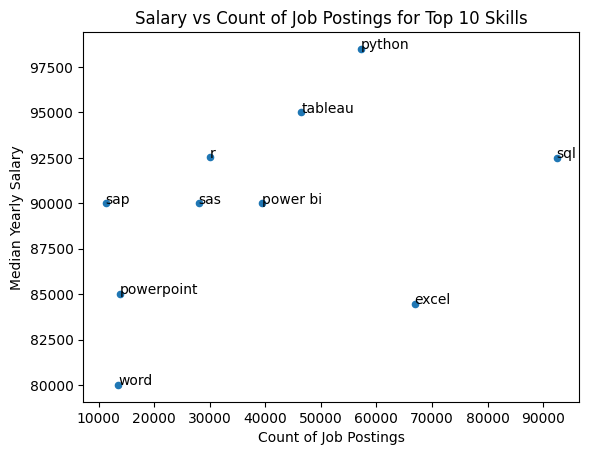

<Figure size 640x480 with 0 Axes>

In [29]:
df_total_skill_count.plot(kind='scatter', x='skill_count', y='median_salary')

for i,txt in enumerate(df_total_skill_count.index):
    plt.text(df_total_skill_count['skill_count'].iloc[i], df_total_skill_count['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')


plt.show()
plt.tight_layout()